### Google Gemini Overview

uv add ipykernel

uv add google-genai

uv add pillow

## Initilization

In [14]:
from google import genai
import os
from getpass import getpass

# Configure the API key
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY") or getpass(
    "Enter Google API Key: "
)

client = genai.Client()

response = client.models.generate_content(
    model='gemini-2.0-flash-exp', contents='How does AI work?'
)
print(response.text)

Okay, let's break down how AI works. It's a broad field, so I'll focus on the core concepts and some common techniques. Think of AI as a spectrum, with simpler rule-based systems on one end and complex, "learning" systems on the other.

**At a High Level:**

The fundamental idea behind AI is to create systems that can perform tasks that typically require human intelligence. These tasks can include:

* **Learning:** Adapting to new data and improving performance over time.
* **Problem-solving:** Finding solutions to complex issues.
* **Reasoning:** Drawing inferences and making logical deductions.
* **Perception:** Understanding and interpreting the world through senses (like vision, hearing, etc.).
* **Natural Language Processing:** Understanding and generating human language.

**Core Concepts:**

Here are some of the key concepts that underpin different types of AI:

1. **Data:** AI thrives on data. The more data you have, often the better an AI system can learn. This data can be stru

In [15]:
from google import genai

client = genai.Client(http_options={'api_version': 'v1alpha'})
model_id = "gemini-2.0-flash-exp"
config = {"response_modalities": ["TEXT"]}

message = "Hey Gemini!"

async with client.aio.live.connect(model=model_id, config=config) as session:
    print("> ", message, "\n")
    await session.send(message, end_of_turn=True)

    async for response in session.receive():
        print(response.text)

>  Hey Gemini! 

Hey
 there! How can I help you today? What's on your mind?


None


In [16]:
from google.genai.types import Tool, GenerateContentConfig, GoogleSearch

google_search_tool = Tool(
    google_search = GoogleSearch()
)

response = client.models._generate_content(
    model=model_id,
    contents="When is the next total solar eclipse in the United States?",
    config=GenerateContentConfig(
        tools=[google_search_tool],
        response_modalities=["TEXT"],
    )
)

for each in response.candidates[0].content.parts:
    print(each.text)
# Example response:
# The next total solar eclipse visible in the contiguous United States will be on ...

# To get grounding metadata as web content.
print(response.candidates[0].grounding_metadata.search_entry_point.rendered_content)

The next total solar eclipse that will be visible in the United States will occur on **March 30, 2033**, but it will only be visible in Alaska. The path of totality will sweep across the northwestern part of the state, from Utqiagvik down to Nome.

The next total solar eclipse that will be visible in the contiguous United States is predicted to occur on **August 23, 2044**. The path of totality will only be visible in three states: Montana, North Dakota, and South Dakota.

Following the 2044 eclipse, there will be another total solar eclipse on **August 12, 2045**, that will cross the entire country from northern California to Florida.

There will be eight total solar eclipses visible from North America in the 21st century, with one occurring about every 12 years, on average. The next total eclipses in North America after 2045, will occur in 2078 and 2099.

<style>
.container {
  align-items: center;
  border-radius: 8px;
  display: flex;
  font-family: Google Sans, Roboto, sans-serif;

In [17]:
from google.genai import types

In [18]:
model_name = "gemini-2.0-flash-exp"

In [19]:
bounding_box_system_instructions = """
    Return bounding boxes as a JSON array with labels. Never return masks or code fencing. Limit to 25 objects.
    If an object is present multiple times, name them according to their unique characteristic (colors, size, position, unique characteristics, etc..).
      """
     

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

In [20]:
from PIL import Image

import io
import os
import requests
from io import BytesIO

In [21]:
import json
import random
import io
from PIL import Image, ImageDraw, ImageFont
from PIL import ImageColor

additional_colors = [colorname for (colorname, colorcode) in ImageColor.colormap.items()]

def plot_bounding_boxes(im, bounding_boxes):
    """
    Plots bounding boxes on an image with markers for each a name, using PIL, normalized coordinates, and different colors.

    Args:
        img_path: The path to the image file.
        bounding_boxes: A list of bounding boxes containing the name of the object
         and their positions in normalized [y1 x1 y2 x2] format.
    """

    # Load the image
    img = im
    width, height = img.size
    print(img.size)
    # Create a drawing object
    draw = ImageDraw.Draw(img)

    # Define a list of colors
    colors = [
    'red',
    'green',
    'blue',
    'yellow',
    'orange',
    'pink',
    'purple',
    'brown',
    'gray',
    'beige',
    'turquoise',
    'cyan',
    'magenta',
    'lime',
    'navy',
    'maroon',
    'teal',
    'olive',
    'coral',
    'lavender',
    'violet',
    'gold',
    'silver',
    ] + additional_colors

    # We parse out the markdown fencing
    bounding_boxes = parse_json(bounding_boxes)

    # Iterate over the bounding boxes
    for i, bounding_box in enumerate(json.loads(bounding_boxes)):
      # Select a color from the list
      color = colors[i % len(colors)]

      # Convert normalized coordinates to absolute coordinates
      abs_y1 = int(bounding_box["box_2d"][0]/1000 * height)
      abs_x1 = int(bounding_box["box_2d"][1]/1000 * width)
      abs_y2 = int(bounding_box["box_2d"][2]/1000 * height)
      abs_x2 = int(bounding_box["box_2d"][3]/1000 * width)

      if abs_x1 > abs_x2:
        abs_x1, abs_x2 = abs_x2, abs_x1

      if abs_y1 > abs_y2:
        abs_y1, abs_y2 = abs_y2, abs_y1

      # Draw the bounding box
      draw.rectangle(
          ((abs_x1, abs_y1), (abs_x2, abs_y2)), outline=color, width=4
      )

      # Draw the text
      if "label" in bounding_box:
        draw.text((abs_x1 + 8, abs_y1 + 6), bounding_box["label"], fill=color)

    # Display the image
    img.show()

In [22]:
def parse_json(json_output):
    # We parse out the markdown fencing
    lines = json_output.splitlines()
    for i, line in enumerate(lines):
        if line == "```json":
            json_output = "\n".join(lines[i+1:])  # Remove everything before "```json"
            json_output = json_output.split("```")[0]  # Remove everything after the closing "```"
            break  # Exit the loop once "```json" is found
    return json_output

In [23]:
import requests

urls = [
   "https://storage.googleapis.com/generativeai-downloads/images/socks.jpg",
   "https://storage.googleapis.com/generativeai-downloads/images/vegetables.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/Japanese_Bento.png",
       "https://storage.googleapis.com/generativeai-downloads/images/Cupcakes.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/origamis.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/fruits.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/cat.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/pumpkins.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/breakfast.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/bookshelf.jpg",
       "https://storage.googleapis.com/generativeai-downloads/images/spill.jpg"
   ]

filenames = [
       "Socks.jpg", "Vegetables.jpg", "Japanese_bento.png", "Cupcakes.jpg",
       "Origamis.jpg", "Fruits.jpg", "Cat.jpg", "Pumpkins.jpg",
       "Breakfast.jpg", "Bookshelf.jpg", "Spill.jpg"
   ]

for url, filename in zip(urls, filenames):
       response = requests.get(url)
       if response.status_code == 200:
           with open(filename, 'wb') as f:
               f.write(response.content)
       else:
           print(f"Failed to download {url}")

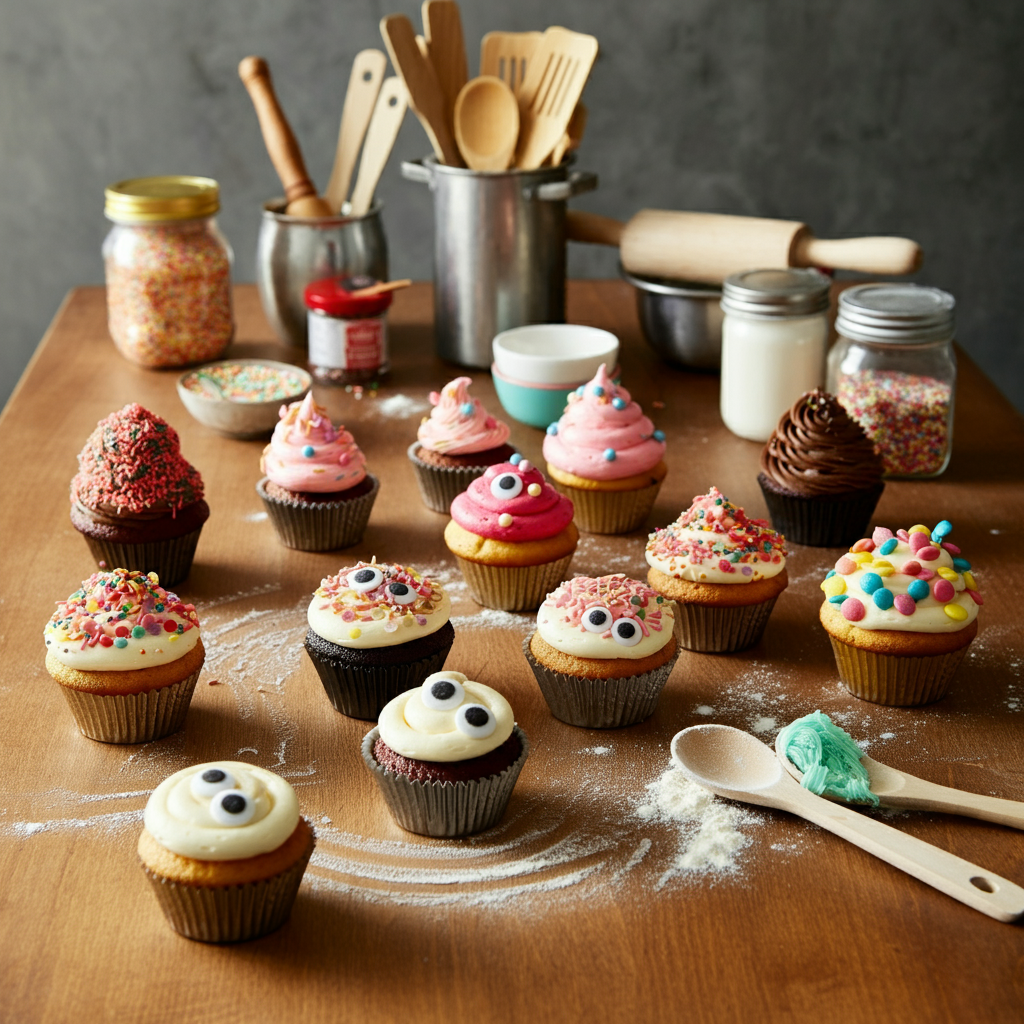

In [24]:
image = "Cupcakes.jpg" # @param ["Socks.jpg","Vegetables.jpg","Japanese_bento.png","Cupcakes.jpg","Origamis.jpg","Fruits.jpg","Cat.jpg","Pumpkins.jpg","Breakfast.jpg","Bookshelf.jpg", "Spill.jpg"] {"allow-input":true}

im = Image.open(image)
im

In [26]:
from io import BytesIO

prompt = "Detect the 2d bounding boxes around each white and black sweet on the cupcakes, if you cannot find it, don't guess (with “label” as description”)"  # @param {type:"string"}

# Load and resize image
img = Image.open(BytesIO(open(image, "rb").read()))
im = Image.open(image).resize((1024, int(1024 * img.size[1] / img.size[0])), Image.Resampling.LANCZOS)

# Run model to find bounding boxes
response = client.models.generate_content(
    model=model_name,
    contents=[prompt, im],
    config = types.GenerateContentConfig(
        system_instruction=bounding_box_system_instructions,
        temperature=0.5,
        safety_settings=safety_settings,
    )
)

# Check output
print(response.text)

```json
[
  {"box_2d": [654, 393, 710, 445], "label": "black sweet"},
  {"box_2d": [703, 446, 758, 496], "label": "black sweet"},
  {"box_2d": [679, 367, 733, 417], "label": "white sweet"},
  {"box_2d": [727, 400, 782, 452], "label": "white sweet"},
  {"box_2d": [748, 177, 803, 228], "label": "black sweet"},
  {"box_2d": [706, 228, 760, 277], "label": "black sweet"},
   {"box_2d": [777, 235, 832, 285], "label": "white sweet"},
  {"box_2d": [666, 201, 720, 250], "label": "white sweet"},
  {"box_2d": [689, 500, 744, 549], "label": "white sweet"},
  {"box_2d": [750, 127, 803, 177], "label": "white sweet"},
   {"box_2d": [700, 552, 753, 602], "label": "white sweet"},
  {"box_2d": [772, 188, 825, 237], "label": "white sweet"},
  {"box_2d": [738, 510, 792, 561], "label": "black sweet"},
  {"box_2d": [711, 281, 766, 330], "label": "white sweet"},
    {"box_2d": [767, 303, 821, 353], "label": "black sweet"},
  {"box_2d": [722, 349, 775, 399], "label": "white sweet"},
  {"box_2d": [693, 316, 74

(1024, 1024)


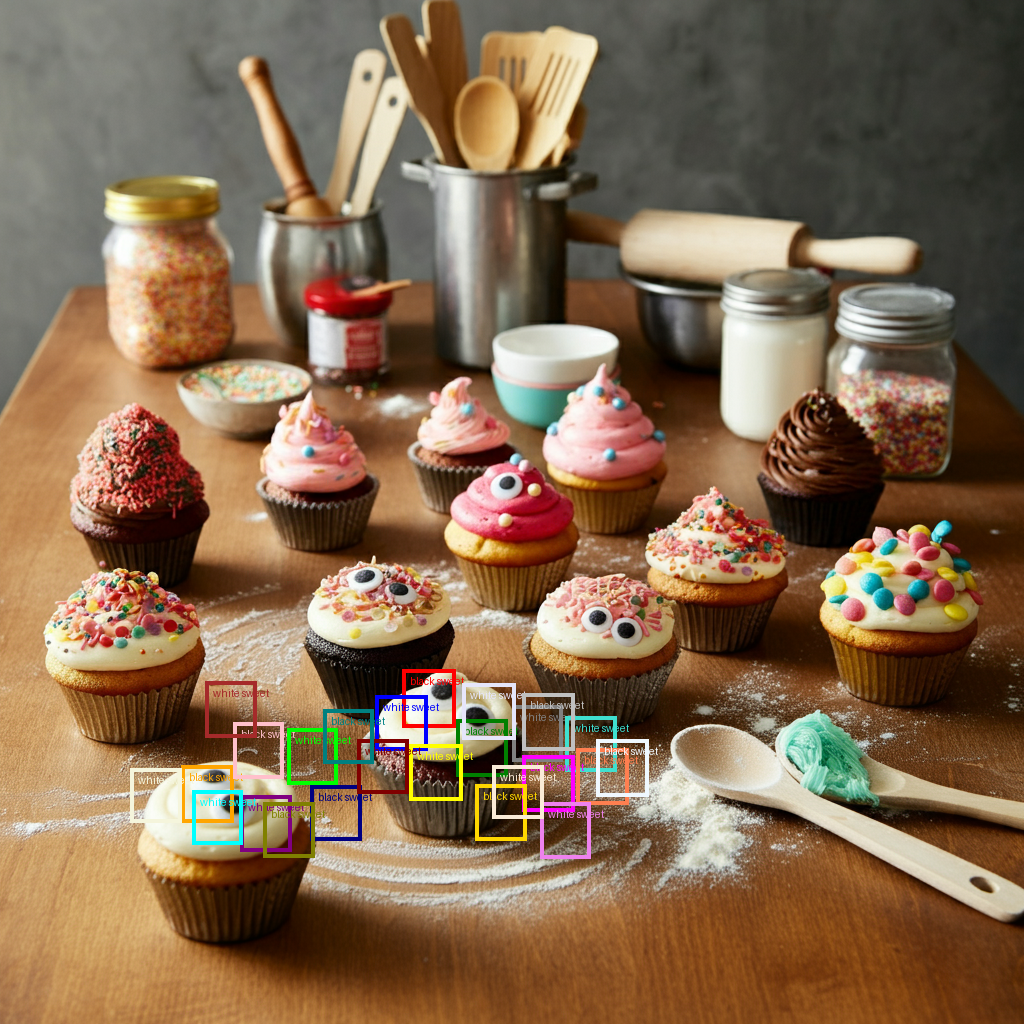

In [27]:
plot_bounding_boxes(im, response.text)
im

In [30]:
# Load and resize image
img = Image.open("Cat.jpg")
img = img.resize((800, int(800 * img.size[1] / img.size[0])), Image.Resampling.LANCZOS) # Resizing to speed-up rendering

# Analyze the image using Gemini
image_response = client.models.generate_content(
    model='gemini-2.0-flash-exp',
    contents=[
        img,
        """
          Point to no more than 10 items in the image, include spill.
          The answer should follow the json format: [{"point": , "label": }, ...]. The points are in [y, x] format normalized to 0-1000.
        """
    ],
    config = types.GenerateContentConfig(
        temperature=0.5
    )
)

# Check response
print(image_response.text)

```json
[
  {"point": [210, 413], "label": "window"},
  {"point": [610, 768], "label": "plant"},
  {"point": [677, 392], "label": "planter"},
  {"point": [192, 106], "label": "window frame"},
  {"point": [843, 932], "label": "planter"},
  {"point": [587, 287], "label": "cat"},
  {"point": [500, 699], "label": "plant leaf"},
    {"point": [747, 633], "label": "planter"},
    {"point": [787, 278], "label": "window sill"},
    {"point": [795, 830], "label": "remote"}
]
```


In [31]:
#@title Point visualization code

import IPython

def parse_json(json_output):
    # We parse out the markdown fencing
    lines = json_output.splitlines()
    for i, line in enumerate(lines):
        if line == "```json":
            json_output = "\n".join(lines[i+1:])  # Remove everything before "```json"
            json_output = json_output.split("```")[0]  # Remove everything after the closing "```"
            break  # Exit the loop once "```json" is found
    return json_output

def generate_point_html(pil_image, points_json):
    # Convert PIL image to base64 string
    import base64
    from io import BytesIO
    buffered = BytesIO()
    pil_image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode()
    points_json = parse_json(points_json)

    return f""" Point Visualization """

In [32]:
# Display the dots on the image
IPython.display.HTML(generate_point_html(img, image_response.text))

In [34]:
# Load and resize image
img = Image.open("Cat.jpg")
img = img.resize((800, int(800 * img.size[1] / img.size[0])), Image.Resampling.LANCZOS)

# Analyze the image using Gemini
image_response = client.models.generate_content(
    model='gemini-2.0-flash-exp',
    contents=[
        img,
        """
          Pinpoint no more than 10 items in the image.
          The answer should follow the json format: [{"point": , "label": }, ...]. The points are in [y, x] format normalized to 0-1000. One element a line.
          Explain how to use each part, put them in the label field, remove duplicated parts and instructions.
        """
    ],
    config = types.GenerateContentConfig(
        temperature=0.5
    )
)

# Display the dots on the image
IPython.display.HTML(generate_point_html(img, image_response.text))

In [36]:
# Load and resize image
img = Image.open("Cat.jpg")
img = img.resize((800, int(800 * img.size[1] / img.size[0])), Image.Resampling.LANCZOS)

# Analyze the image using Gemini
image_response = client.models.generate_content(
    model='gemini-2.0-flash-exp',
    contents=[
        img,
        """
          Point to no more than 10 items in the image.
          The answer should follow the json format: [{"point": , "label": }, ...]. The points are in [y, x] format normalized to 0-1000. One element a line.
          Explain how to prevent kids from getting hurt, put them in the label field, remove duplicated parts and instructions.
        """
    ],
    config = types.GenerateContentConfig(
        temperature=0.5
    )
)

# Display the dots on the image
IPython.display.HTML(generate_point_html(img, image_response.text))

In [37]:
# Load and resize image
img = Image.open("Cat.jpg")
img = img.resize((800, int(800 * img.size[1] / img.size[0])), Image.Resampling.LANCZOS)

# Analyze the image using Gemini
image_response = client.models.generate_content(
    model='gemini-2.0-flash-exp',
    contents=[
        img,
        """
          Point to no more than 10 items in the image.
          The answer should follow the json format: [{"point": , "label": }, ...]. The points are in [y, x] format normalized to 0-1000. One element a line.
          Give advices on how to make this space more feng-shui, put them in the label field, remove duplicated parts and instructions.
        """
    ],
    config = types.GenerateContentConfig(
        temperature=0.5
    )
)

# Display the dots on the image
IPython.display.HTML(generate_point_html(img, image_response.text))

In [38]:
# Load the selected image
img = Image.open("Cat.jpg")

# Analyze the image using Gemini
image_response = client.models.generate_content(
    model='gemini-2.0-flash-exp',
    contents=[
        img,
        """
          Detect the 3D bounding boxes of no more than 10 items.
          Output a json list where each entry contains the object name in "label" and its 3D bounding box in "box_3d"
          The 3D bounding box format should be [x_center, y_center, z_center, x_size, y_size, z_size, roll, pitch, yaw].
        """
      ],
    config = types.GenerateContentConfig(
        temperature=0.5
    )
)

# Check response
print(image_response.text)

```json
[
  {"label": "cat", "box_3d": [0.01,1.17,-0.02,0.32,0.46,0.51,17,1,-42]},
  {"label": "plant", "box_3d": [-0.5,1.43,-0.03,0.34,0.33,0.4,16,-5,-21]},
  {"label": "plant", "box_3d": [0.22,1.18,-0.08,0.32,0.32,0.48,17,-2,-32]},
  {"label": "plant", "box_3d": [0.47,1.11,-0.22,0.13,0.13,0.23,17,-2,-31]},
  {"label": "plant", "box_3d": [-0.07,1.27,-0.11,0.47,0.29,0.34,15,-7,-14]},
  {"label": "remote", "box_3d": [0.35,1.07,-0.33,0.06,0.13,0.24,11,13,-69]},
    {"label": "window", "box_3d": [-0.11,1.47,0.3,0.87,1.06,1.0,17,0,-39]},
  {"label": "window", "box_3d": [-0.19,1.26,0.55,0.24,0.76,0.68,104,72,51]},
  {"label": "window", "box_3d": [0.62,2.11,0.72,0.35,0.69,0.62,11,-13,10]},
  {"label": "window", "box_3d": [0.22,2.08,0.78,0.32,0.67,0.56,17,-1,-33]}
]
```


In [39]:
#@title 3D box visualization code

import IPython

def parse_json(json_output):
    # We parse out the markdown fencing
    lines = json_output.splitlines()
    for i, line in enumerate(lines):
        if line == "```json":
            json_output = "\n".join(lines[i+1:])  # Remove everything before "```json"
            json_output = json_output.split("```")[0]  # Remove everything after the closing "```"
            break  # Exit the loop once "```json" is found
    return json_output

def generate_3d_box_html(pil_image, boxes_json):
    # Convert PIL image to base64 string
    import base64
    from io import BytesIO
    buffered = BytesIO()
    pil_image.save(buffered, format="PNG")
    img_str = base64.b64encode(buffered.getvalue()).decode()
    boxes_json = parse_json(boxes_json)

    return f""" 3D Box Visualization FOV: 60  Zoom: 1.5x"""

In [40]:
# Display the 3D boundinx boxes

IPython.display.HTML(generate_3d_box_html(img, image_response.text))

In [42]:
# Load the selected image
img = Image.open("Cat.jpg")

# Analyze the image using Gemini
image_response = client.models.generate_content(
    model='gemini-2.0-flash-exp',
    contents=[
        img,
        """
          Detect the 3D bounding boxes of range hood, stove top, oven, counter top, plants, shelf, cabinets
          Output a json list where each entry contains the object name in "label" and its 3D bounding box in "box_3d"
          The 3D bounding box format should be [x_center, y_center, z_center, x_size, y_size, z_size, roll, pitch, yaw].
        """
      ],
    config = types.GenerateContentConfig(
        temperature=0.5
    )
)

# Display the 3D boundinx boxes
IPython.display.HTML(generate_3d_box_html(img, image_response.text))

In [43]:
# Load the selected image
img = Image.open("Cat.jpg")

# Analyze the image using Gemini
image_response = client.models.generate_content(
    model='gemini-2.0-flash-exp',
    contents=[
        img,
        """
          Detect the 3D bounding boxes of microwave, blender, toaster, 2 curtains, sink.
          Output a json list where each entry contains the object name in "label" and its 3D bounding box in "box_3d"
          The 3D bounding box format should be [x_center, y_center, z_center, x_size, y_size, z_size, roll, pitch, yaw].
        """
      ],
    config = types.GenerateContentConfig(
        temperature=0.5
    )
)

# Display the 3D boundinx boxes
IPython.display.HTML(generate_3d_box_html(img, image_response.text))

In [45]:
# Load the selected image
img = Image.open("spill.jpg")

# Analyze the image using Gemini
image_response = client.models.generate_content(
    model='gemini-2.0-flash-exp',
    contents=[
        img,
        """
          Find the 3D bounding boxes of no more than 10 items, include spill, return a json array with the objects having keys \"label\" and \"box_3d\"
        """
      ],
    config = types.GenerateContentConfig(
        temperature=0.5
    )
)

im = IPython.display.HTML(generate_3d_box_html(img, image_response.text))

In [51]:
from IPython.display import display, HTML
from PIL import Image

# Load the selected image
img = Image.open("spill.jpg")

# Analyze the image using Gemini
image_response = client.models.generate_content(
    model='gemini-2.0-flash-exp',
    contents=[
        img,
        """
          Find the 3D bounding boxes of no more than 10 items, include spill, return a json array with the objects having keys \"label\" and \"box_3d\"
        """
    ],
    config=types.GenerateContentConfig(
        temperature=0.5
    )
)

# Generate HTML for displaying the image with 3D bounding boxes
html_content = generate_3d_box_html(img, image_response.text)

# Display the HTML content in the notebook
display(HTML(html_content))